### math 510 project

In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# constants

N = 200        # number of neurons (200)
M = 5          # number of external inputs to the network (?)
T = 100        # total time of the simulation (?)
delta_t = 0.1  # length of the time step (?)
tau = 1        # relaxation time constant (0.03)
g = 1.5        # scaling factor (1.5)

In [174]:
# initialize the activations x to uniform noise in the range [-0.1, 0.1]

x = 0.1 * (2 * np.random.rand(N,1) - 1)

In [175]:
# initialize the external inputs

u = np.zeros((M,1))

In [176]:
# initialize the weights J, taken from normal distribution with
# mean 0 and standard deviation g / sqrt(N)

J = np.random.normal(loc=0.0, scale=(g/np.sqrt(N)), size=(N,N))

In [177]:
# initialize the (external) weights B, taken from uniform distribution
# over [-1, 1]

B = 2 * np.random.rand(N,M) - 1

In [178]:
# calculate dx/dt (equation 3, p. 18)

def calculate_derivative(x, u, J, B, tau):
    r = np.tanh(x)
    return (1.0 / tau) * (-x + np.dot(J,r) + np.dot(B,u))

In [179]:
# calculate euler approximation of the time step

def euler_timestep(x, u, J, B, tau, delta_t):
    return x + calculate_derivative(x, u, J, B, tau) * delta_t

In [180]:
# run the simulation of the updates to the excitation

x_s = []  # keep track of x[0] over time for the plot
t_s = []  # trial numbers for the plot

for trial in range(int(round(T/delta_t))):
    x = euler_timestep(x, u, J, B, tau, delta_t)
    x_s.append(x[0])
    t_s.append(trial)
    #print "trial:", trial
    #print x

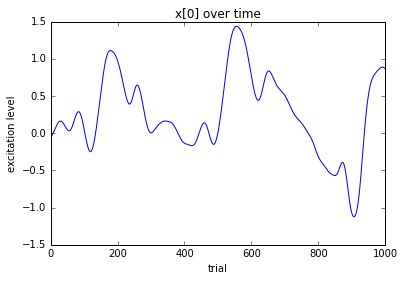

In [181]:
# plot x_s against t_s
plt.plot(t_s, x_s)
plt.title('x[0] over time')
plt.xlabel('trial')
plt.ylabel('excitation level')
plt.show()